# Multiple Linear Regression

Abhishek Prajapat <br>
101816053

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# For jupyter-notebook interface
%matplotlib inline

------------------

## Startup Data

In [3]:
data = pd.read_csv('../input/50_Startups.csv')
data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)

In [6]:
data['State'] = le.fit_transform(data['State'])

In [7]:
data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,2,192261.83
1,162597.7,151377.59,443898.53,0,191792.06


In [8]:
new = ohe.fit_transform(np.array(data['State']).reshape(-1,1))

In [9]:
new = pd.DataFrame(new)
data = data.join(new)
data = data.drop(columns=[0, 'State'])
data.head(2)

,R&D Spend,Administration,Marketing Spend,Profit,1,2
0,165349.2,136897.80,471784.10,192261.83,0.0,1.0
1,162597.7,151377.59,443898.53,191792.06,0.0,0.0


In [10]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns='Profit'), data['Profit'], test_size=0.3)

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((35, 5), (35,), (15, 5), (15,))

In [12]:
model = LinearRegression()

In [13]:
model.fit(x_train, y_train)

LinearRegression()

In [14]:
mean_absolute_error(y_test, model.predict(x_test))

7174.997341210478

In [15]:
median_absolute_error(y_test, model.predict(x_test))

6028.921781192272

Total features:  5


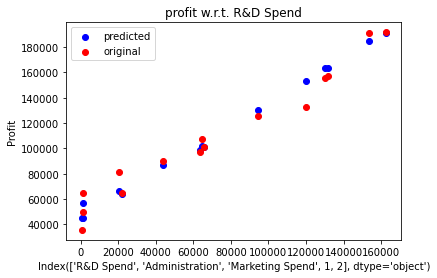

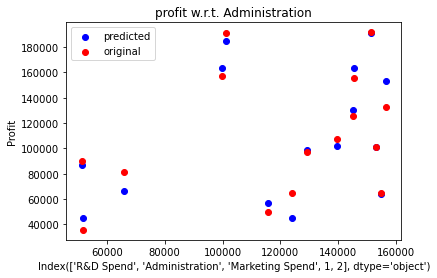

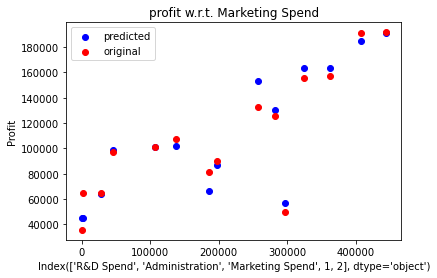

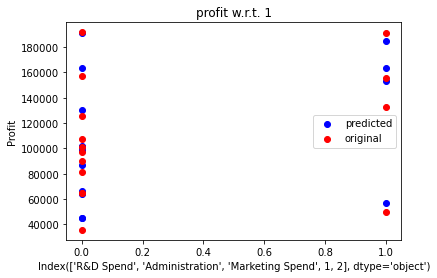

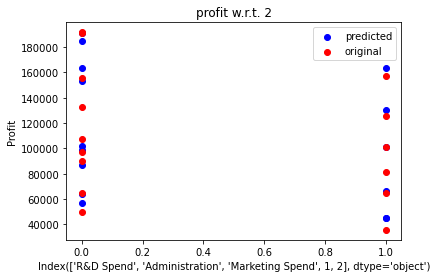

In [16]:
columns = x_train.columns
print('Total features: ', len(columns))

y_pred = model.predict(x_test)

for count, column in enumerate(columns) :
    plt.figure()
    plt.scatter(x_test[column], y_pred, color='blue', label='predicted')
    plt.scatter(x_test[column], y_test, color='red', label='original')
    plt.xlabel(str(columns))
    plt.ylabel('Profit')
    plt.legend()
    plt.title('profit w.r.t. ' + str(column))

------------------

## House Price Data

In [17]:
data = pd.read_csv('../input/kc_house_data.csv')
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [19]:
data = data.drop(columns = ['id', 'date'])

In [20]:
data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [21]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns='price'), data['price'], test_size=0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15129, 18), (15129,), (6484, 18), (6484,))

In [22]:
model = LinearRegression()

In [23]:
model.fit(x_train, y_train)

LinearRegression()

In [24]:
median_absolute_error(y_test, model.predict(x_test))

88541.29313621344

In [25]:
mean_absolute_error(y_test, model.predict(x_test))

124989.65485735366

Total features:  18


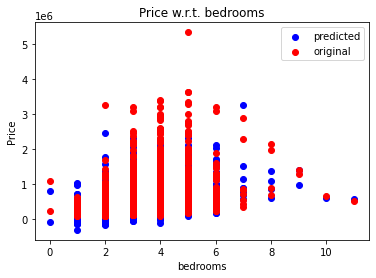

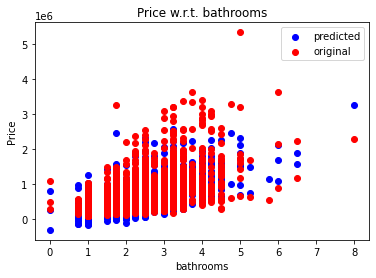

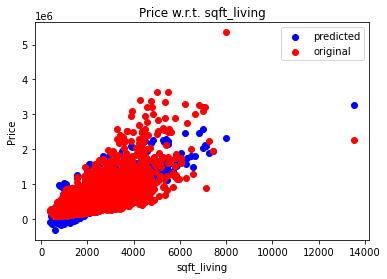

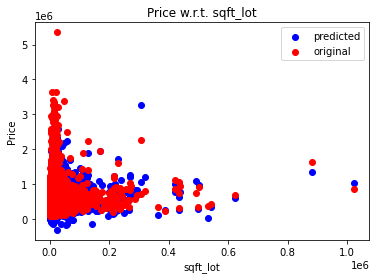

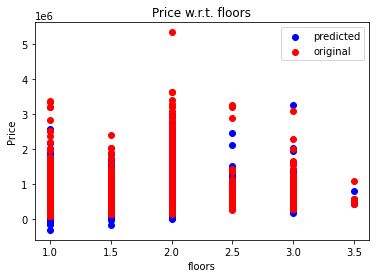

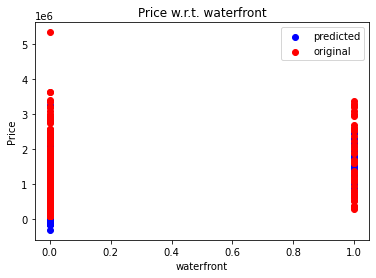

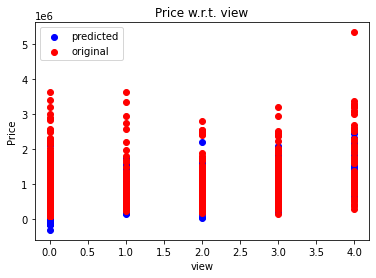

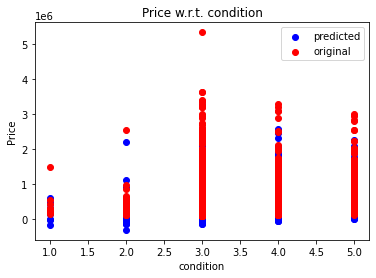

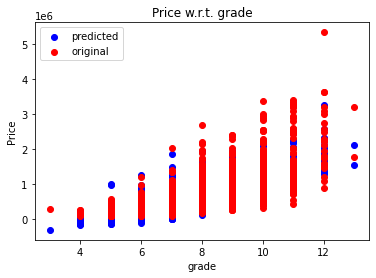

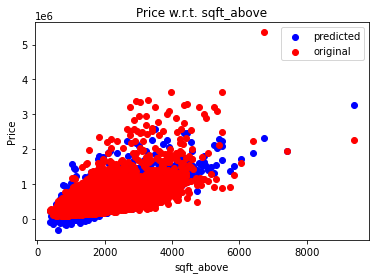

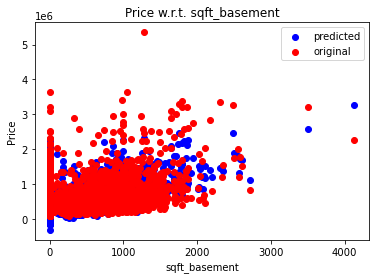

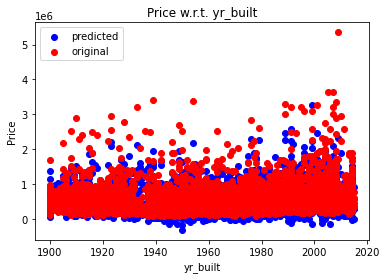

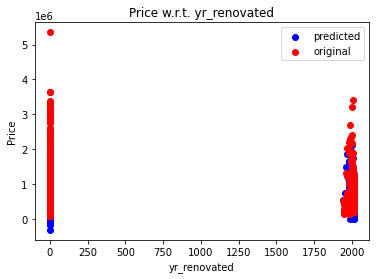

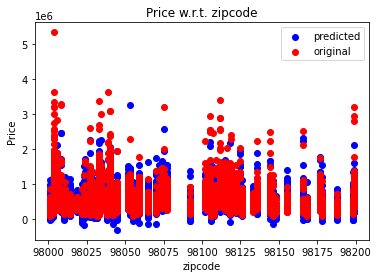

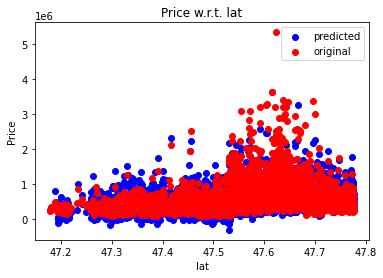

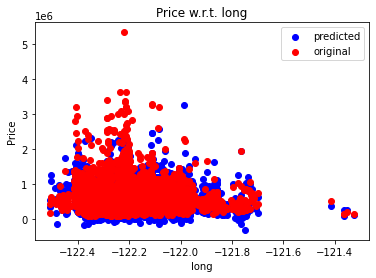

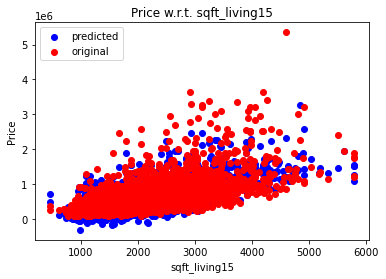

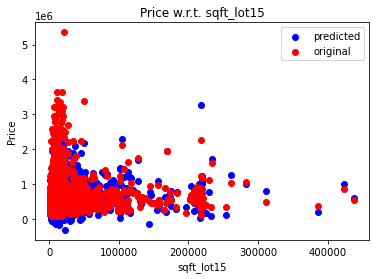

In [26]:
columns = x_train.columns
print('Total features: ', len(columns))

y_pred = model.predict(x_test)

for count, column in enumerate(columns) :
    plt.figure()
    plt.scatter(x_test[column], y_pred, color='blue', label='predicted')
    plt.scatter(x_test[column], y_test, color='red', label='original')
    plt.xlabel(str(column))
    plt.ylabel('Price')
    plt.legend()
    plt.title('Price w.r.t. ' + str(column))

---------------------

## Salary Position Data (Polynomial Regression)

In [27]:
data = pd.read_csv('../input/Position_Salaries.csv')
data.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [28]:
data = data.drop(columns='Position')

### Before polynomial features

In [29]:
model = LinearRegression()
model.fit(np.array(data['Level']).reshape(-1,1), data['Salary'])

salary_predicted = model.predict(np.array(data['Level']).reshape(-1,1))

In [30]:
mean_absolute_error(data['Salary'], salary_predicted)

128454.54545454546

In [31]:
median_absolute_error(data['Salary'], salary_predicted)

119500.0

Text(0.5, 1.0, 'Position vs Salary')

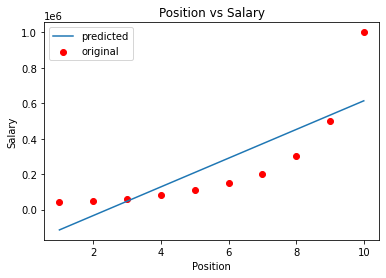

In [32]:
plt.figure()
plt.scatter(data['Level'], data['Salary'], color='red', label='original')
plt.plot(data['Level'], salary_predicted, label='predicted')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.legend()
plt.title('Position vs Salary')

## After polynomial features

In [33]:
pf = PolynomialFeatures(degree=3)

In [34]:
new_data = pf.fit_transform(np.array(data['Level']).reshape(-1,1))
new_data = pd.DataFrame(new_data, columns=[0,'Level', 'Level**2', 'Level**3'])
new_data.drop(columns=0, inplace=True)

In [35]:
new_data.head()

,Level,Level**2,Level**3
0,1.0,1.0,1.0
1,2.0,4.0,8.0
2,3.0,9.0,27.0
3,4.0,16.0,64.0
4,5.0,25.0,125.0


In [36]:
new_model = LinearRegression()
new_model = model.fit(new_data, data['Salary'])
salary_predicted = model.predict(new_data)

Text(0.5, 1.0, 'Position vs Salary')

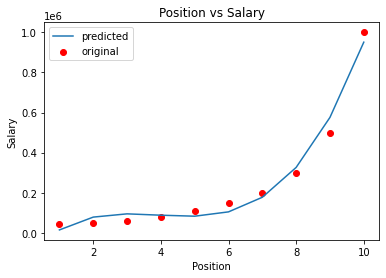

In [37]:
plt.figure()
plt.scatter(new_data['Level'], data['Salary'], color='red', label='original')
plt.plot(new_data['Level'], salary_predicted, label='predicted')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.legend()
plt.title('Position vs Salary')

In [38]:
mean_absolute_error(data['Salary'], salary_predicted)

34790.20979020975

In [39]:
median_absolute_error(data['Salary'], salary_predicted)

29428.904428905094

--------------------

## US data 

In [40]:
data = pd.read_csv('../input/us.csv')
data.head(2)

,Day,cases,deaths
0,1,1,0
1,2,1,0


In [41]:
data = data[['cases', 'deaths']]
data.shape

(212, 2)

## Before polynomial features

In [42]:
model = LinearRegression()
model.fit(np.array(data['cases']).reshape(-1,1), data['deaths'])
deaths_predicated = model.predict(np.array(data['cases']).reshape(-1,1))

Text(0.5, 1.0, 'Cases vs Deaths')

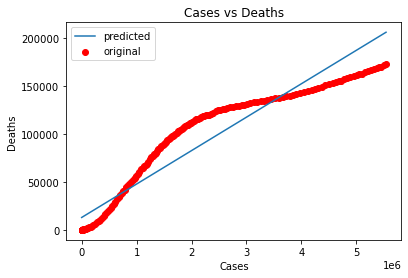

In [43]:
plt.figure()
plt.scatter(data['cases'], data['deaths'], color='red', label='original')
plt.plot(data['cases'], deaths_predicated, label='predicted')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()
plt.title('Cases vs Deaths')

In [44]:
median_absolute_error(np.array(data['deaths']).reshape(-1,1), deaths_predicated)

13602.642538511656

In [45]:
mean_absolute_error(np.array(data['deaths']).reshape(-1,1), deaths_predicated)

16869.848404670996

## After polynomial features

In [46]:
pf = PolynomialFeatures(degree=3)
new_data = pf.fit_transform(np.array(data['cases']).reshape(-1,1))
new_data = pd.DataFrame(new_data, columns=[0,'Cases', 'Cases**2', 'Cases**3'])
new_data.drop(columns=0, inplace=True)

In [47]:
model = LinearRegression()
model.fit(new_data, data['deaths'])
deaths_predicated = model.predict(new_data)

Text(0.5, 1.0, 'Cases vs Deaths')

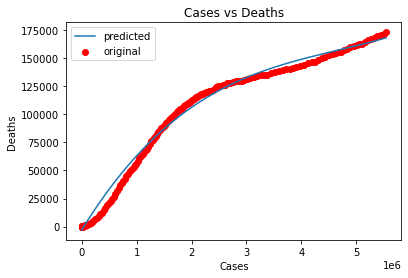

In [48]:
plt.figure()
plt.scatter(new_data['Cases'], data['deaths'], color='red', label='original')
plt.plot(new_data['Cases'], deaths_predicated, label='predicted')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()
plt.title('Cases vs Deaths')

In [49]:
median_absolute_error(np.array(data['deaths']).reshape(-1,1), deaths_predicated)

2968.498884361213

In [50]:
mean_absolute_error(np.array(data['deaths']).reshape(-1,1), deaths_predicated)

4173.120905622665